In [1]:
from data_preparation import DataPreparator
from apply_clustering import ClusteringApplier

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Run this to make sure the "normal way" still works
VALIDATE_THE_OTHER_WAY = False

if VALIDATE_THE_OTHER_WAY:
    DataPreparator.prepare_data()
    optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot()
    ClusteringApplier.calculate_observable_patterns(_n_clusters=optimal_number_of_clusters)
    ClusteringApplier.calculate_explainable_distances()

In [4]:
df_observable = pd.read_excel('../data/biological_set_raw_data.xlsx')
df_explainable = pd.read_excel('../data/biological_set_explaining_features.xlsx')

In [39]:
observed_features = ['perc_lying', 'perc_lhd', 'num_lying', 'num_lhd']
explaining_features = ['Age', 'Sex', 'Zoo', 'Stable', 'Genus_ID', 'Family_ID','Order_ID', 'SH', 'Weight', 'Habitat']
index_name = 'Individual'

In [6]:
preparation_result = DataPreparator.prepare_data(
    use_config=False,
    df_observable=df_observable,
    df_explainable=df_explainable,
    distortion_mean=0.,
    distortion_std=0.001,
    observed_features=observed_features,
    explaining_features=explaining_features,
    nn_imputation_k=10,
    group_name=index_name
)

In [7]:
preparation_result.keys()

dict_keys(['explainable_df', 'explainable_scaling', 'observable_df', 'observable_scaling', 'sample_size_df'])

In [8]:
preparation_result['observable_df']

,Individual,date,perc_lying,perc_lhd,num_lying,num_lhd,oversampled
0,A.nas_01,2020-03-04,0.682330,0.278189,0.214280,0.293174,False
1,A.nas_01,2020-03-05,0.552966,0.278819,0.286019,0.245398,False
2,A.nas_01,2020-03-06,0.665929,0.238780,0.286021,0.561424,False
3,A.nas_01,2020-03-07,0.756257,0.170037,0.428396,0.341886,False
4,A.nas_01,2020-03-08,0.808046,0.178717,0.356946,0.291586,False
...,...,...,...,...,...,...,...
9667,T.str_04,2019-09-15,0.402420,0.075623,0.570899,0.097422,True
9668,T.str_04,2019-10-12,0.632173,0.105177,0.500702,0.218687,True
9669,T.str_04,2019-10-11,0.550897,0.052721,0.501112,0.123885,True
9670,T.str_04,2019-09-22,0.546714,0.092166,0.500284,0.243865,True


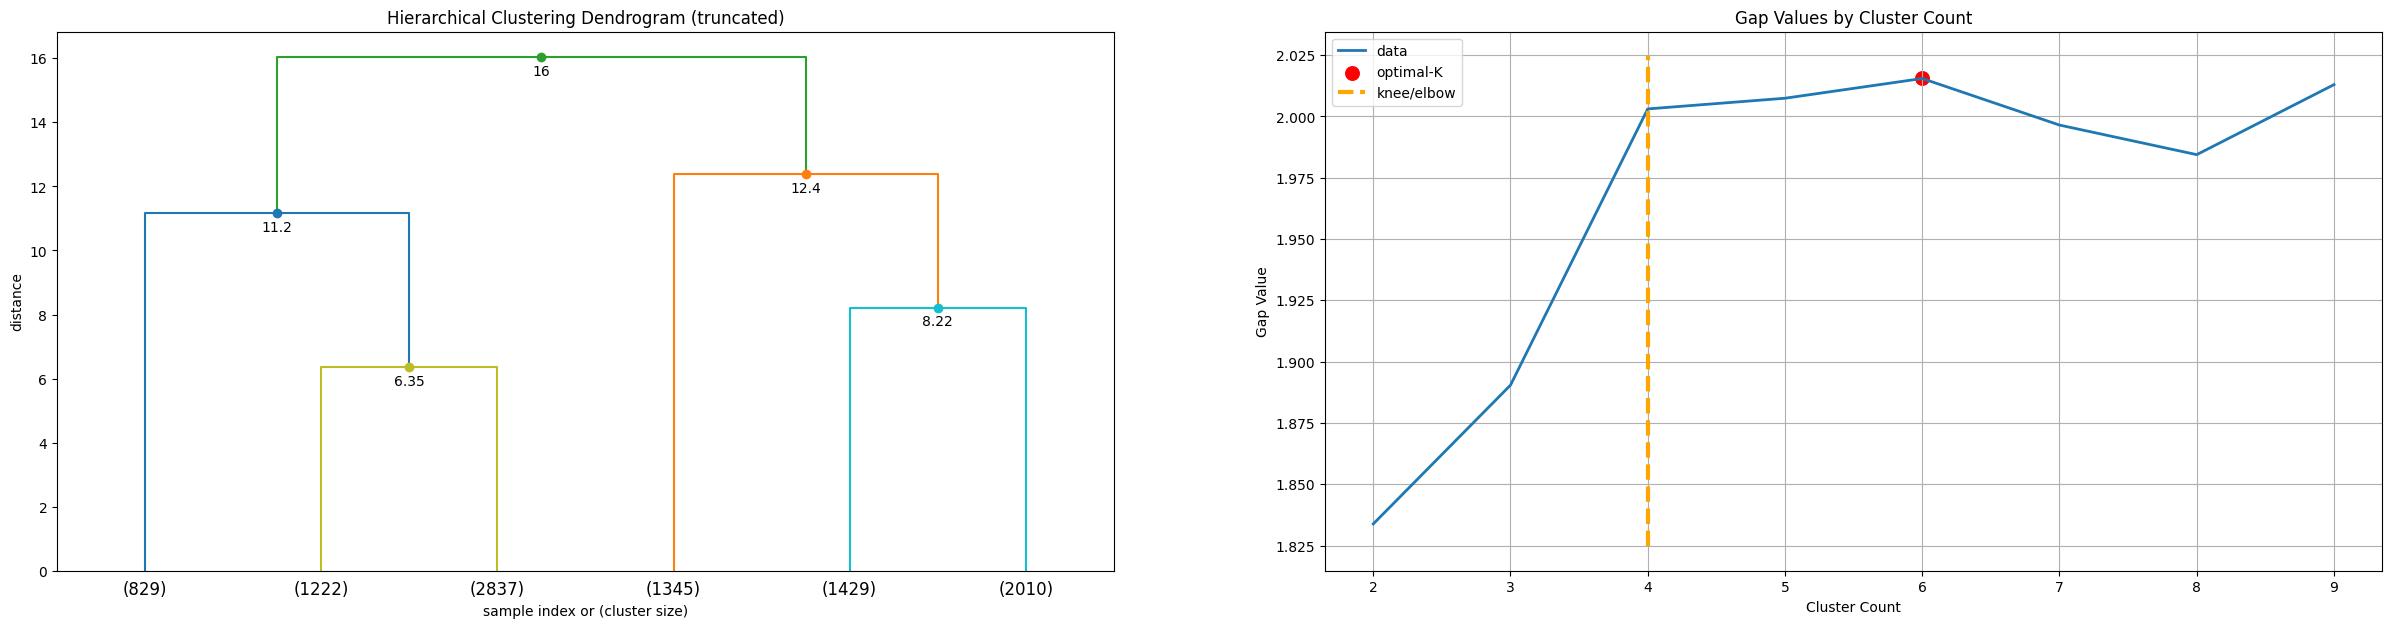

In [9]:
optimal_number_of_clusters = ClusteringApplier.draw_gap_statistic_plot(
    use_config=False, df_observable=preparation_result['observable_df'],
    observed_features=observed_features,
    gap_statistic_cluster_range=10
)

In [10]:
optimal_number_of_clusters

np.int64(4)

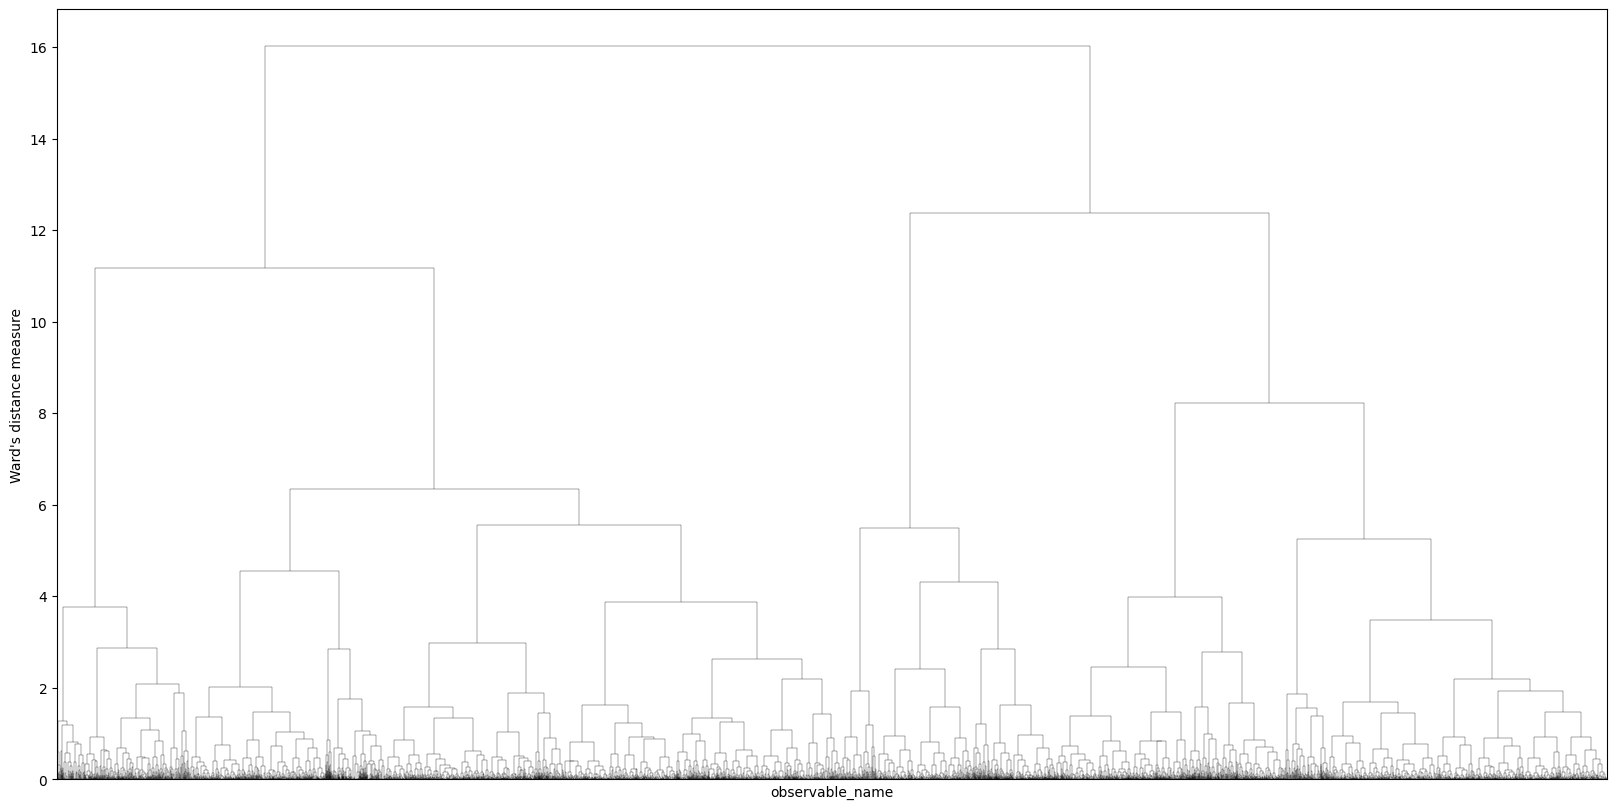

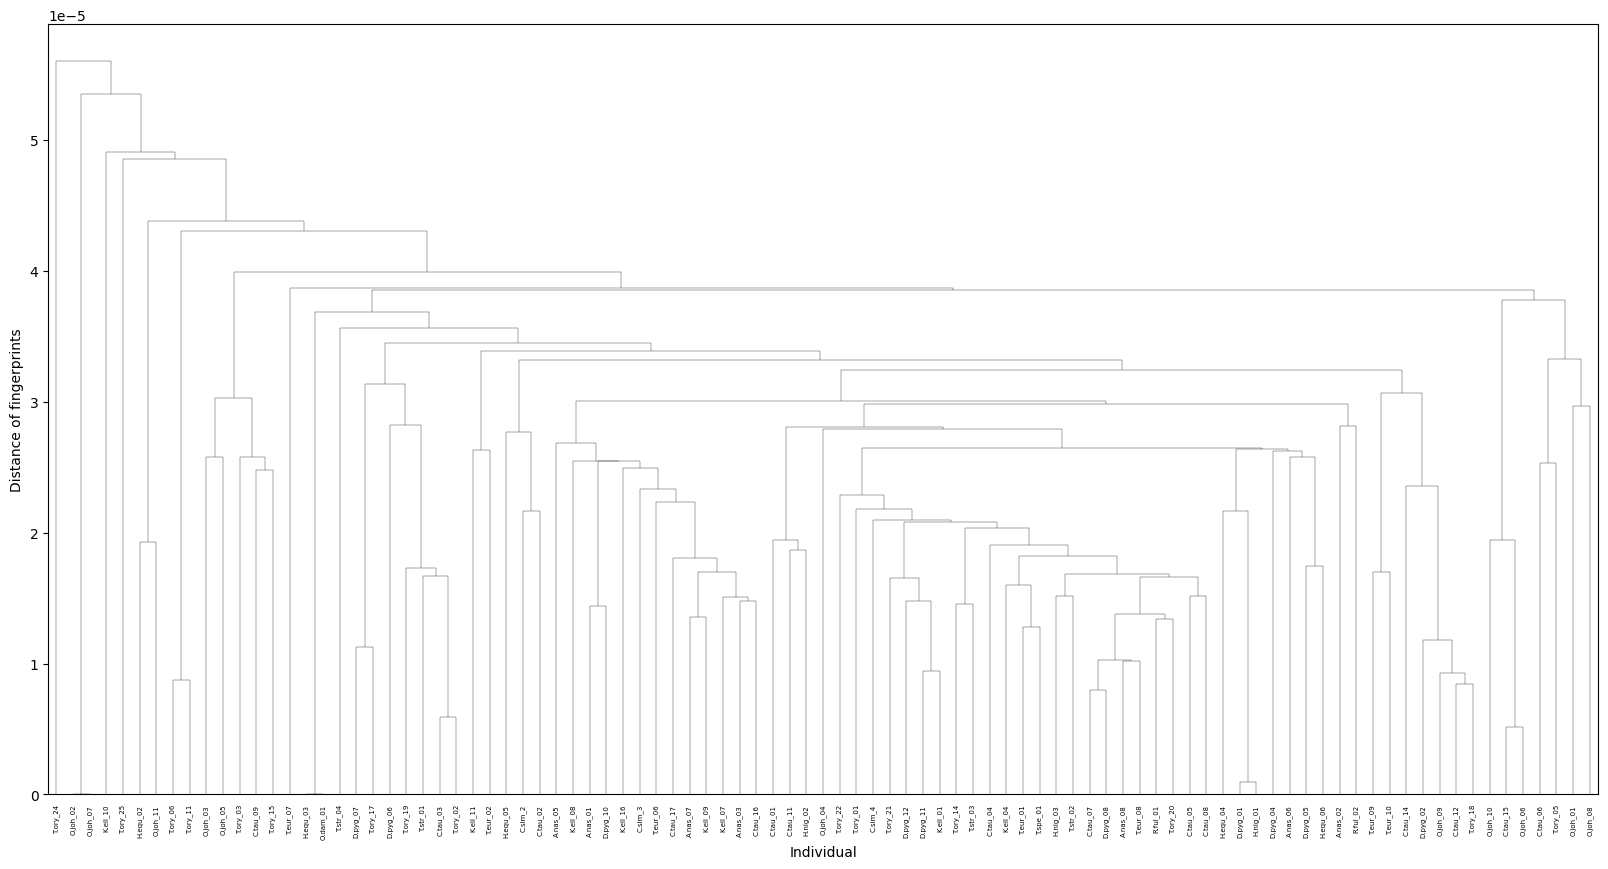

In [11]:
observable_patterns_result = ClusteringApplier.calculate_observable_patterns(
    use_config=False,
    df_observable_data=preparation_result['observable_df'],
    _n_clusters=optimal_number_of_clusters,
    observable_name='observable_name',
    observable_feature_names=observed_features,
    plot_title='Name of the fingerprint plot',
    number_observable_patterns='auto',
    distance_measure_fingerprint='jensenshannon',
    group_name=index_name, 
)

In [12]:
observable_patterns_result['spider_plots']

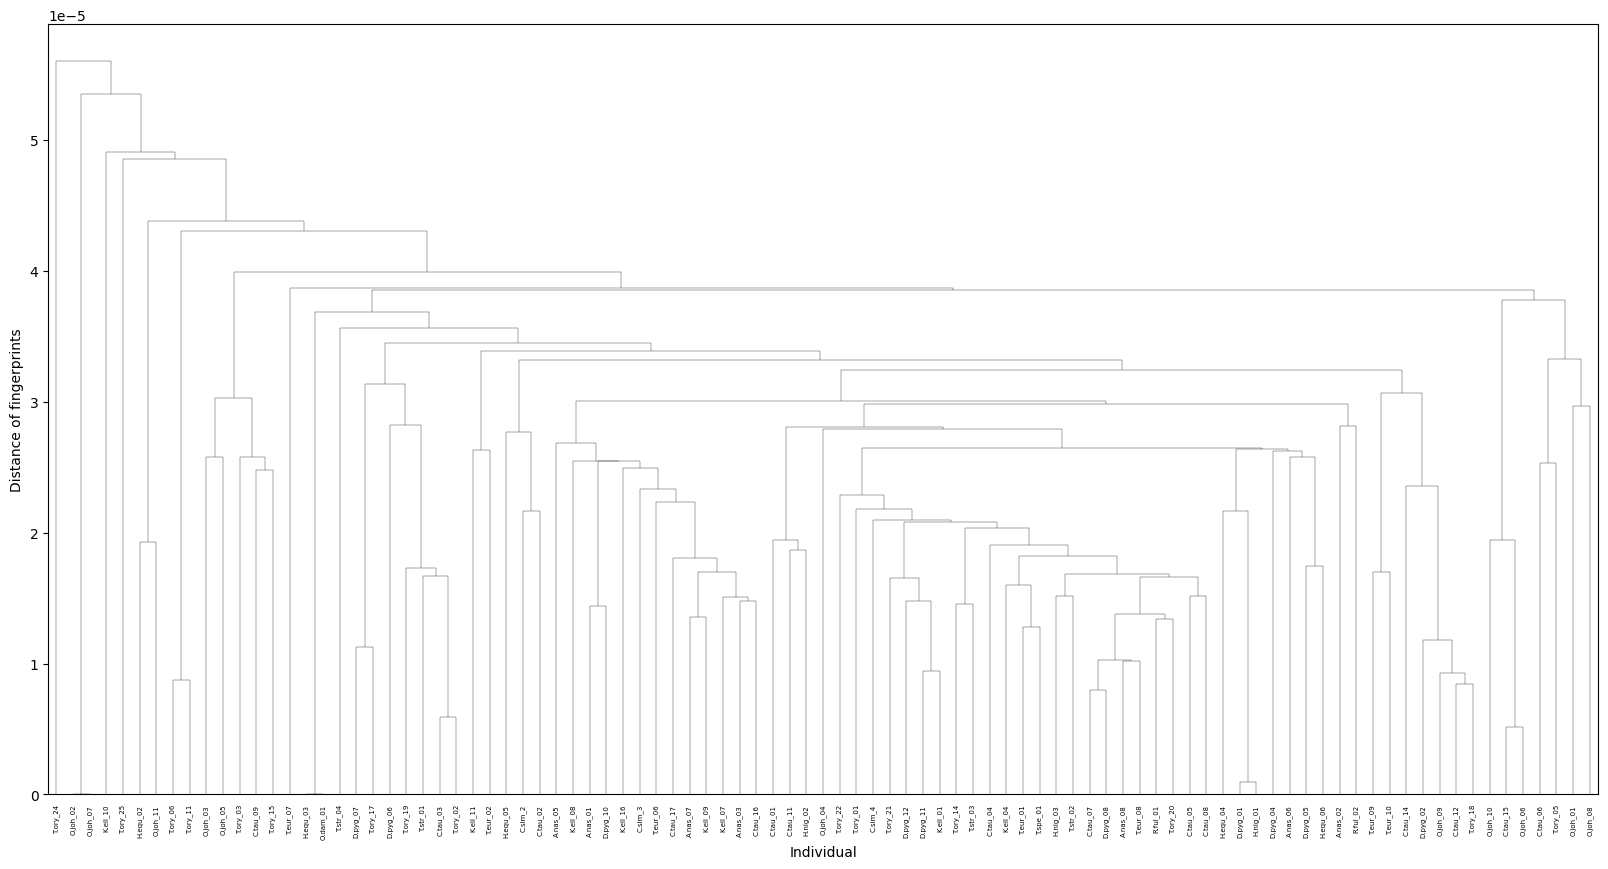

In [13]:
observable_patterns_result['fingerprint_distance_plots']


In [14]:
observable_patterns_result.keys()

dict_keys(['df_cluster_median', 'df_observable_data', 'df_fingerprint', 'pw_dist', 'pw_norm_dist', 'spider_plots', 'fingerprint_distance_plots'])

In [15]:
observable_patterns_result['df_observable_data'].head()

,Individual,date,perc_lying,perc_lhd,num_lying,num_lhd,oversampled,pattern_type
0,A.nas_01,2020-03-04,0.682330,0.278189,0.214280,0.293174,False,1
1,A.nas_01,2020-03-05,0.552966,0.278819,0.286019,0.245398,False,2
2,A.nas_01,2020-03-06,0.665929,0.238780,0.286021,0.561424,False,3
3,A.nas_01,2020-03-07,0.756257,0.170037,0.428396,0.341886,False,1
4,A.nas_01,2020-03-08,0.808046,0.178717,0.356946,0.291586,False,1


In [16]:
observable_patterns_result['pw_norm_dist']

Individual,A.nas_01,A.nas_02,A.nas_03,A.nas_05,A.nas_06,A.nas_07,A.nas_08,C.sim_2,C.sim_3,C.sim_4,...,T.ory_20,T.ory_21,T.ory_22,T.ory_24,T.ory_25,T.spe_01,T.str_01,T.str_02,T.str_03,T.str_04
Individual,,,,,,,,,,,,,,,,,,,,,
A.nas_01,0.000000,0.000095,0.000045,0.000027,0.000060,0.000067,0.000107,0.000086,0.000039,0.000065,...,0.000109,0.000096,0.000082,0.000172,0.000141,0.000080,0.000167,0.000149,0.000170,0.000183
A.nas_02,0.000095,0.000000,0.000081,0.000110,0.000111,0.000060,0.000058,0.000148,0.000101,0.000107,...,0.000057,0.000072,0.000063,0.000171,0.000129,0.000074,0.000090,0.000072,0.000094,0.000114
A.nas_03,0.000045,0.000081,0.000000,0.000059,0.000093,0.000028,0.000107,0.000123,0.000024,0.000087,...,0.000110,0.000096,0.000082,0.000145,0.000107,0.000093,0.000155,0.000142,0.000163,0.000176
A.nas_05,0.000027,0.000110,0.000059,0.000000,0.000055,0.000080,0.000113,0.000081,0.000051,0.000053,...,0.000116,0.000095,0.000082,0.000184,0.000155,0.000083,0.000174,0.000158,0.000180,0.000192
A.nas_06,0.000060,0.000111,0.000093,0.000055,0.000000,0.000105,0.000090,0.000064,0.000092,0.000029,...,0.000092,0.000077,0.000074,0.000210,0.000180,0.000051,0.000160,0.000138,0.000161,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T.spe_01,0.000080,0.000074,0.000093,0.000083,0.000051,0.000091,0.000041,0.000101,0.000104,0.000050,...,0.000043,0.000039,0.000041,0.000208,0.000172,0.000000,0.000117,0.000093,0.000120,0.000137
T.str_01,0.000167,0.000090,0.000155,0.000174,0.000160,0.000133,0.000079,0.000198,0.000173,0.000151,...,0.000080,0.000097,0.000105,0.000205,0.000172,0.000117,0.000000,0.000050,0.000056,0.000084
T.str_02,0.000149,0.000072,0.000142,0.000158,0.000138,0.000124,0.000060,0.000171,0.000159,0.000135,...,0.000053,0.000087,0.000094,0.000206,0.000171,0.000093,0.000050,0.000000,0.000034,0.000064


  0%|          | 0/1013 [00:00<?, ?it/s]

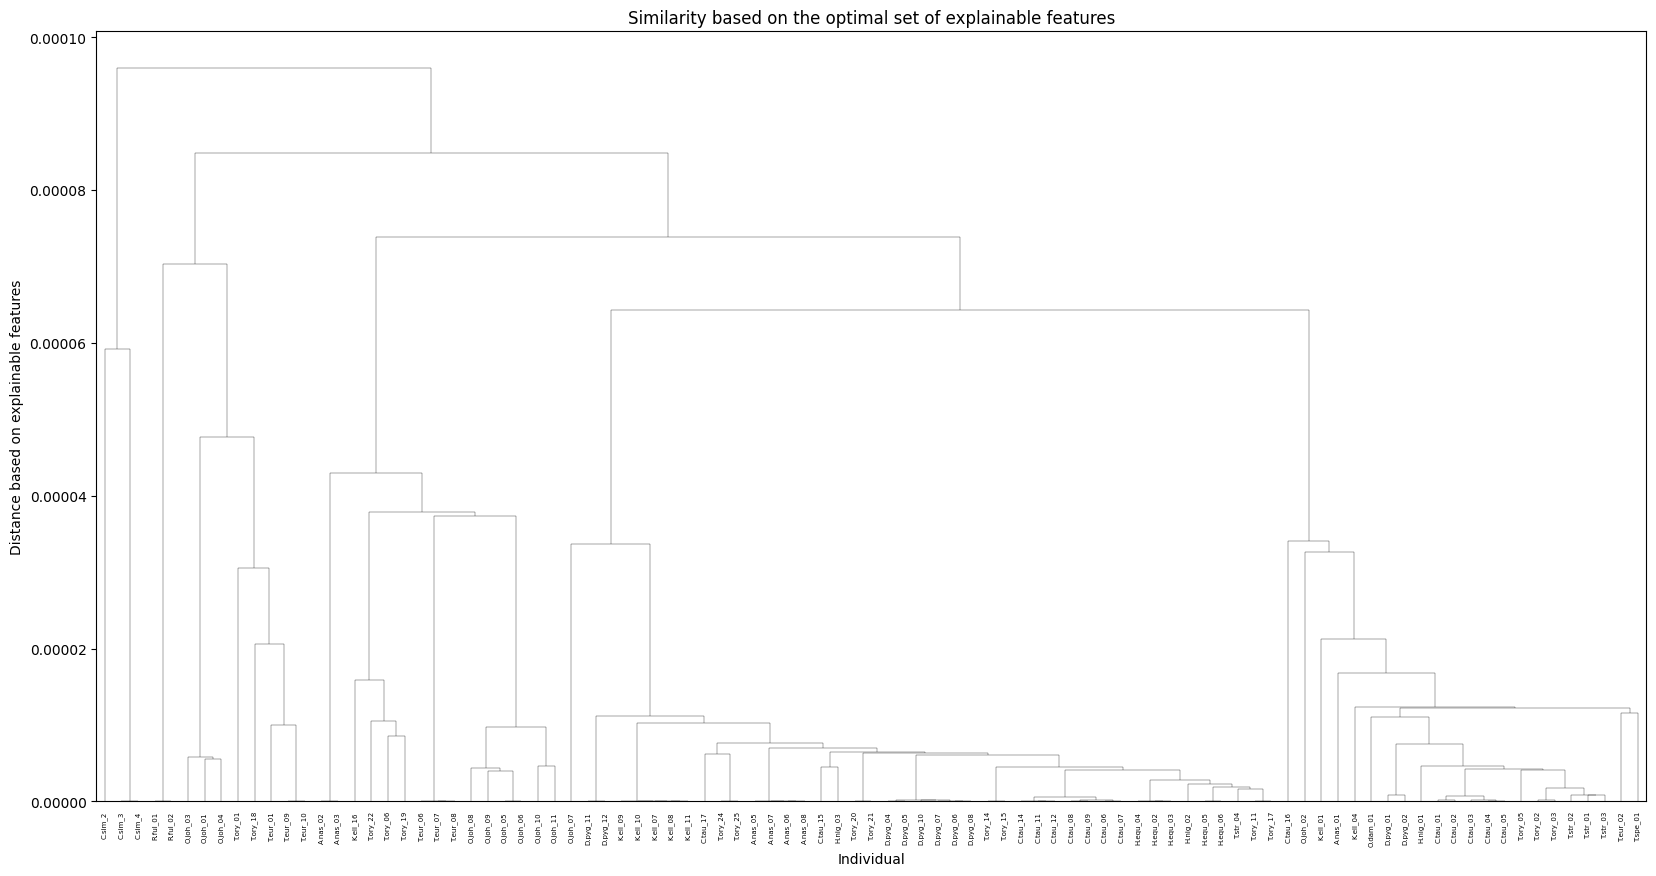

In [17]:
calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
    use_config=False,
    df_explainable=preparation_result['explainable_df'].copy(),
    df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
    explaining_features=explaining_features,
    method='exact',
    distance_measure='correlation',
    sparsity_parameter=0.001,
    max_num_threads=12,
    group_name=index_name
)

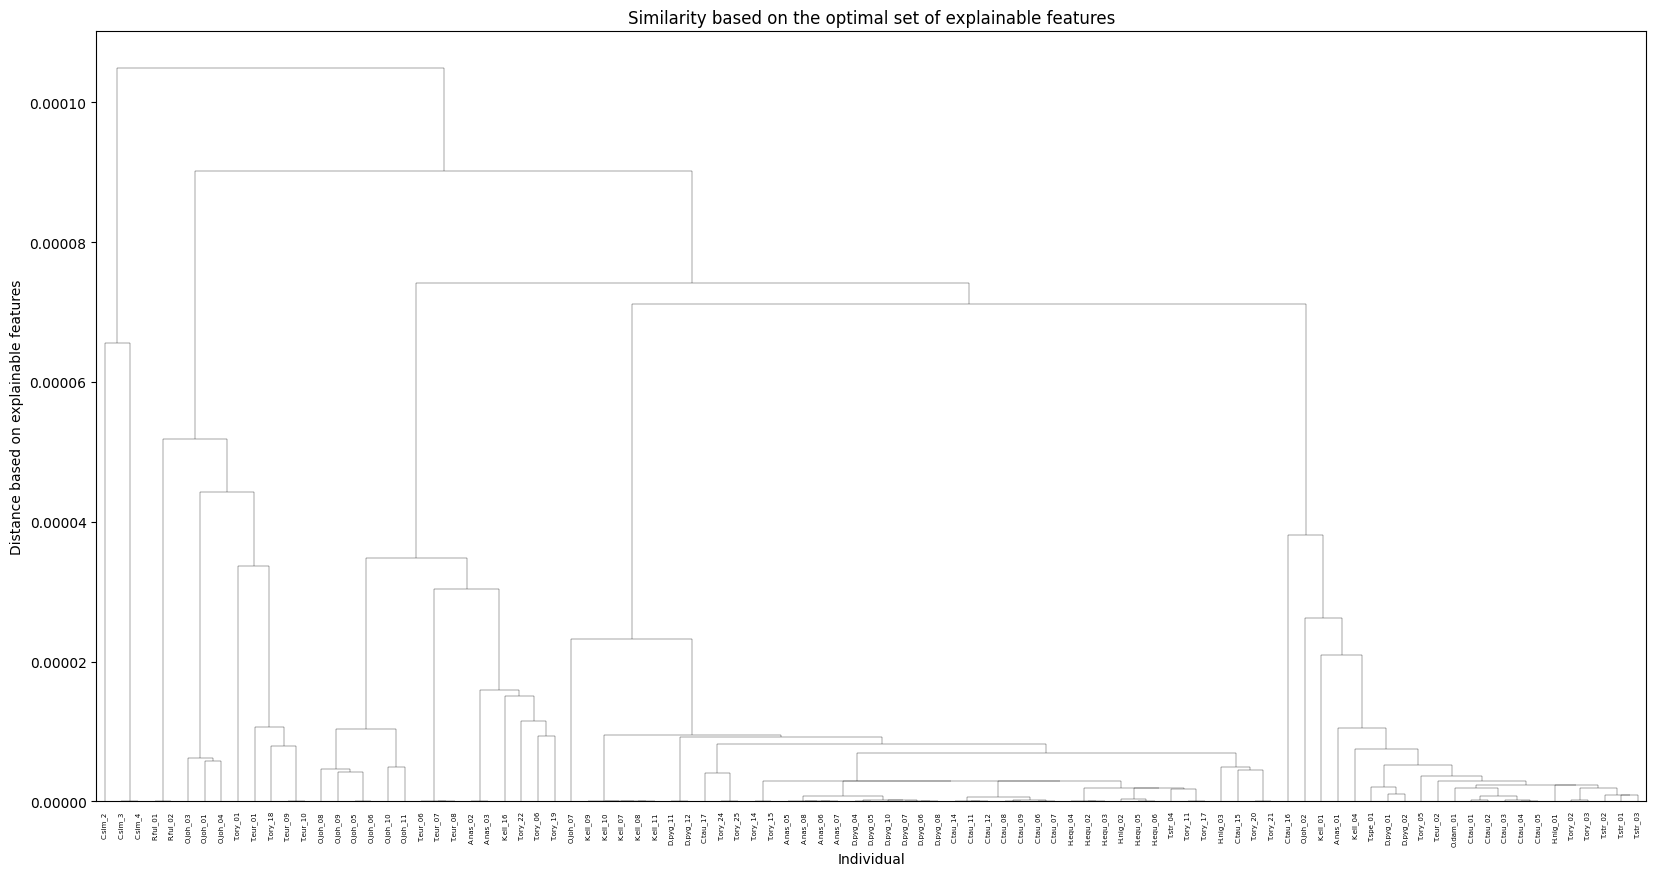

In [51]:
heuristic_calculate_explainable_distances_result = ClusteringApplier.calculate_explainable_distances(
    use_config=False,
    df_explainable=preparation_result['explainable_df'].copy(),
    df_observable_distances=observable_patterns_result['pw_norm_dist'].copy(),
    explaining_features=explaining_features.copy(),
    method='heuristic',
    distance_measure='correlation',
    sparsity_parameter=0.001,
    max_num_threads=12,
    group_name=index_name
)

In [53]:
calculate_explainable_distances_result.keys()

dict_keys(['overview_df', 'df_explainable_distances', 'dendrogram', 'optimal_feature_set'])

In [54]:
calculate_explainable_distances_result['optimal_feature_set']

['Genus_ID', 'Weight']

In [55]:
heuristic_calculate_explainable_distances_result['optimal_feature_set']

['Habitat']

In [56]:
...

Ellipsis